In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate a random sample size between 3000 and 5000
sample_size = np.random.randint(3000, 5000)

# Generate BorrowerID (unique identifier)
borrower_ids = np.arange(1, sample_size + 1)

# Generate numerical attributes
loan_amounts = np.random.randint(1000, 100000, size=sample_size)  # Loan amounts between 1k and 100k
incomes = np.random.randint(20000, 200000, size=sample_size)      # Incomes between 20k and 200k
credit_scores = np.random.randint(300, 850, size=sample_size)    # Credit scores between 300 and 850
employment_durations = np.random.randint(0, 30, size=sample_size) # Employment durations in years

# Generate categorical attributes
loan_types = np.random.choice(['Personal', 'Auto', 'Mortgage', 'Education', 'Small Business'], size=sample_size)
industries = np.random.choice(['IT', 'Healthcare', 'Retail', 'Finance', 'Manufacturing'], size=sample_size)

# Generate Default status (binary variable)
default_probabilities = np.clip((700 - credit_scores) / 400, 0, 1)  # Lower scores have higher default probabilities
defaults = np.random.binomial(1, default_probabilities)

# Create the dataset
dataset = pd.DataFrame({
    'BorrowerID': borrower_ids,
    'LoanAmount': loan_amounts,
    'Income': incomes,
    'CreditScore': credit_scores,
    'EmploymentDuration': employment_durations,
    'LoanType': loan_types,
    'Industry': industries,
    'Default': defaults
})

# Display the first few rows of the dataset
print(dataset.head())

# Save the dataset to a CSV file
#dataset.to_csv('borrowers_dataset.csv', index=False)

   BorrowerID  LoanAmount  Income  CreditScore  EmploymentDuration  \
0           1       16795   31308          609                  29   
1           2        1860  196743          335                   5   
2           3       77820  110306          738                  25   
3           4       55886  126984          624                  24   
4           5        7265   22204          606                  23   

         LoanType       Industry  Default  
0       Education             IT        1  
1  Small Business     Healthcare        1  
2       Education  Manufacturing        0  
3        Mortgage     Healthcare        1  
4       Education             IT        1  


In [43]:
df = dataset.set_index('BorrowerID')
df.head()

,LoanAmount,Income,CreditScore,EmploymentDuration,LoanType,Industry,Default
BorrowerID,,,,,,,
1,16795,31308,609,29,Education,IT,1
2,1860,196743,335,5,Small Business,Healthcare,1
3,77820,110306,738,25,Education,Manufacturing,0
4,55886,126984,624,24,Mortgage,Healthcare,1
5,7265,22204,606,23,Education,IT,1


## Feature Engineering

In [44]:
df['debt-to-income-ratio'] = df['LoanAmount'] / df['Income'] 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4126 entries, 1 to 4126
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LoanAmount            4126 non-null   int64  
 1   Income                4126 non-null   int64  
 2   CreditScore           4126 non-null   int64  
 3   EmploymentDuration    4126 non-null   int64  
 4   LoanType              4126 non-null   object 
 5   Industry              4126 non-null   object 
 6   Default               4126 non-null   int64  
 7   debt-to-income-ratio  4126 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 290.1+ KB


## Data exploration

In [46]:
df['Default'].value_counts()

Default
0    2625
1    1501
Name: count, dtype: int64

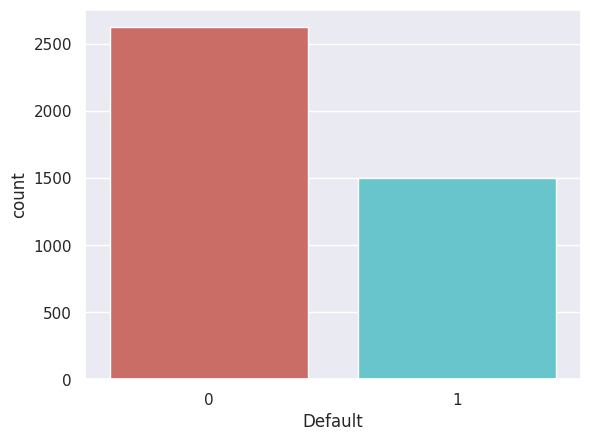

In [47]:
sns.countplot(x='Default', data=df, palette='hls')
plt.show()

In [48]:
corr = df.drop('Default', axis=1).select_dtypes(['float64', 'int64']).corr()
corr

,LoanAmount,Income,CreditScore,EmploymentDuration,debt-to-income-ratio
LoanAmount,1.000000,0.018053,0.021187,0.005546,0.561656
Income,0.018053,1.000000,0.004584,0.012140,-0.599912
CreditScore,0.021187,0.004584,1.000000,-0.011062,0.022290
EmploymentDuration,0.005546,0.012140,-0.011062,1.000000,-0.009589
debt-to-income-ratio,0.561656,-0.599912,0.022290,-0.009589,1.000000


## Use the heatplot to check for muilticolinearity

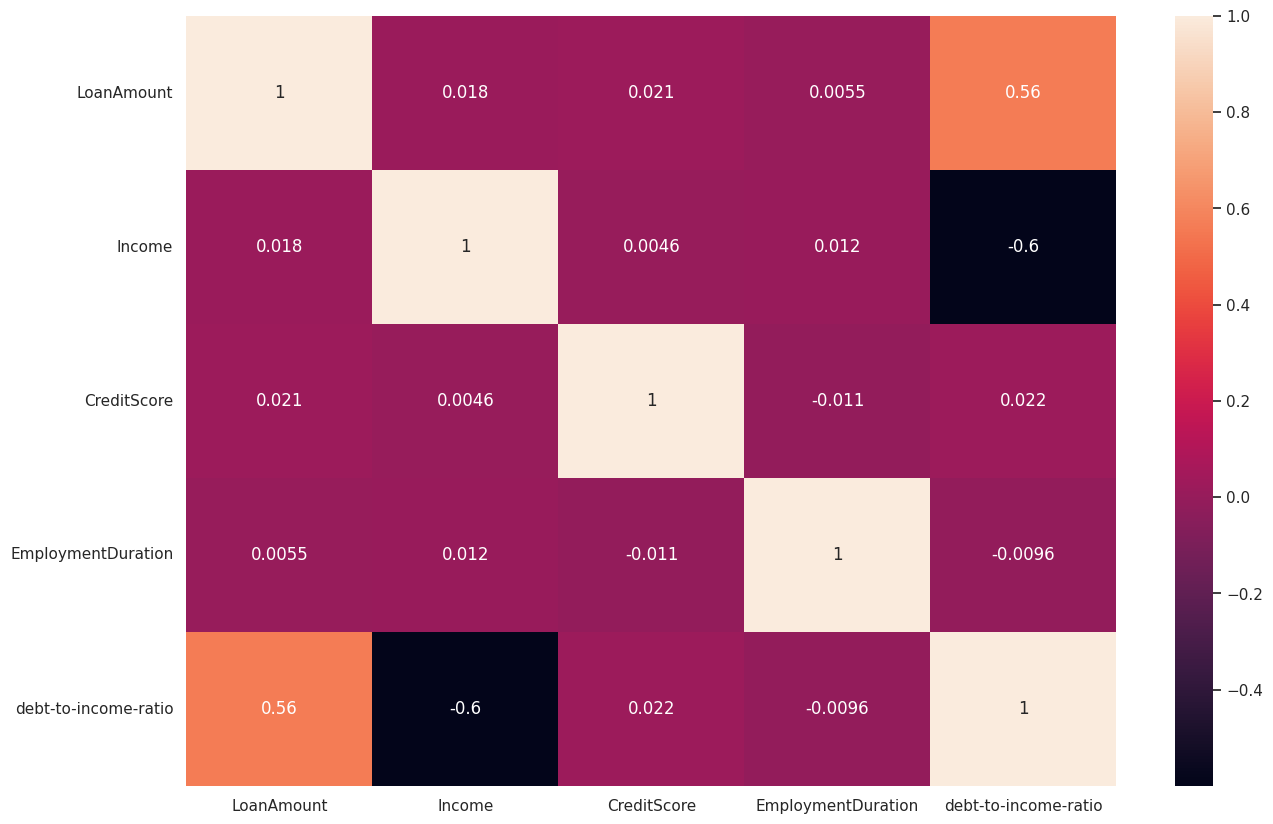

In [49]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, ax=ax)
plt.show()

#### It seems income and loan amount are correlated with debt-to-income-ratio we will drop income and still manage loan amount

In [50]:
df.drop('Income', axis=1, inplace=True)

In [51]:
df_with_dummie = pd.get_dummies(df,['LoanType', 'Industry'] ,dtype='int')

In [52]:
df_with_dummie.head()

,LoanAmount,CreditScore,EmploymentDuration,Default,debt-to-income-ratio,LoanType_Auto,LoanType_Education,LoanType_Mortgage,LoanType_Personal,LoanType_Small Business,Industry_Finance,Industry_Healthcare,Industry_IT,Industry_Manufacturing,Industry_Retail
BorrowerID,,,,,,,,,,,,,,,
1,16795,609,29,1,0.536444,0,1,0,0,0,0,0,1,0,0
2,1860,335,5,1,0.009454,0,0,0,0,1,0,1,0,0,0
3,77820,738,25,0,0.705492,0,1,0,0,0,0,0,0,1,0
4,55886,624,24,1,0.440103,0,0,1,0,0,0,1,0,0,0
5,7265,606,23,1,0.327193,0,1,0,0,0,0,0,1,0,0


In [53]:
x = df_with_dummie.drop(['Default'], axis=1) 
y = df_with_dummie.Default
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [54]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [55]:
lr = LogisticRegression()
lr.fit(x_scaled, y_train)

LogisticRegression()

In [56]:
y_pred = lr.predict(x_scaled_test)

In [57]:
from sklearn.metrics import classification_report, accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.8292978208232445

In [58]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       536
           1       0.75      0.77      0.76       290

    accuracy                           0.83       826
   macro avg       0.81      0.82      0.81       826
weighted avg       0.83      0.83      0.83       826



In [59]:
coefficients = lr.coef_
features =  x.columns
feat_imp = pd.Series(coefficients[0], index=features)
feat_imp

LoanAmount                 0.095342
CreditScore               -2.266418
EmploymentDuration        -0.010211
debt-to-income-ratio      -0.048527
LoanType_Auto             -0.029018
LoanType_Education         0.046828
LoanType_Mortgage         -0.053924
LoanType_Personal          0.007177
LoanType_Small Business    0.030761
Industry_Finance           0.032469
Industry_Healthcare       -0.013898
Industry_IT               -0.027853
Industry_Manufacturing    -0.013198
Industry_Retail            0.023278
dtype: float64

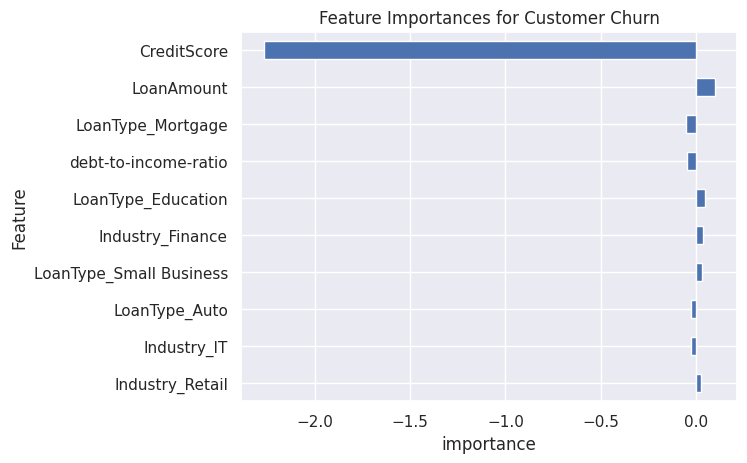

In [60]:
# Build bar chart
feat_imp.sort_values(key=abs).tail(10).plot(kind='barh')


# Label axes
plt.xlabel("importance")
plt.ylabel("Feature")

# Add title
plt.title("Feature Importances for Customer Churn");

## Credit Score is really significant in determining loan default